In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


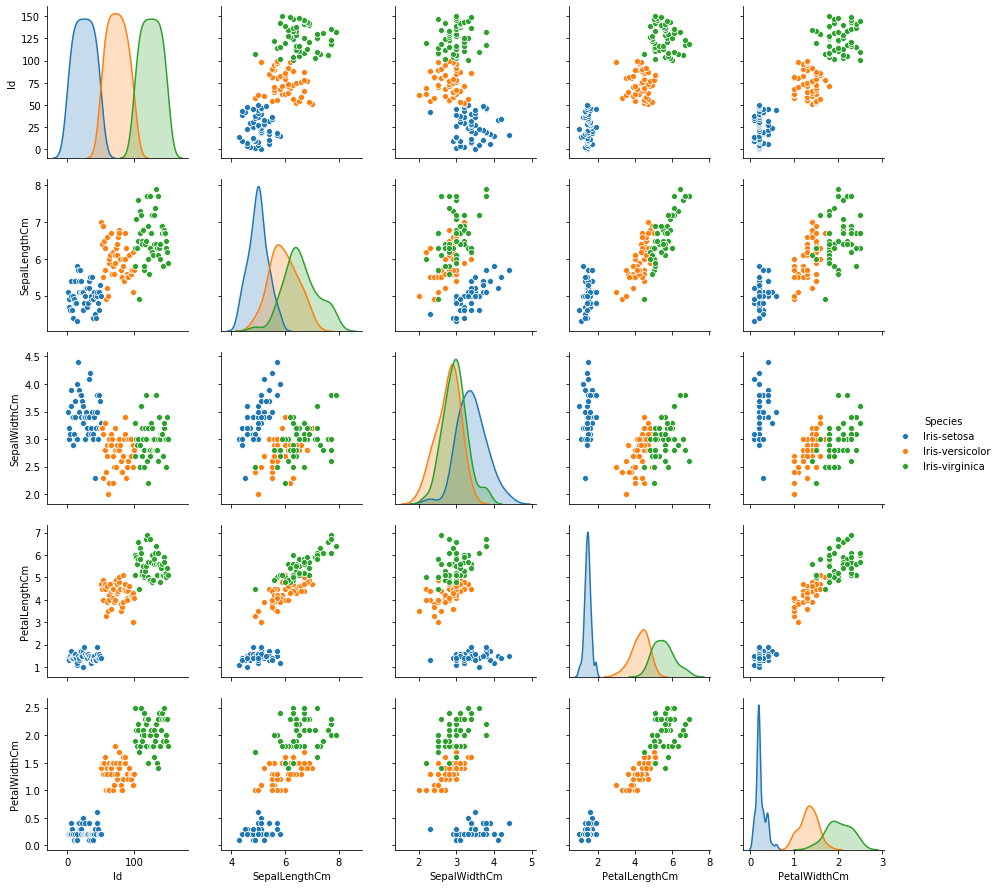

In [8]:
sns.pairplot(data = data, hue = "Species")
plt.show()

# UNDERSTANDING KNN ON A PSEUDO DATASET

In [11]:
x = [26,11, 15, 15, 30, 30, 20, 7, 10,21, 30, 15, 3, 5, 20, 7]
y = [26,11, 30, 5, 3, 16, 20, 7, 20,11, 30, 15, 3, 30, 20, 7]
names = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p"]

p = [26, 15] # arbitrary points
q = [26, 20]

# REFERENCE POINTS M & N
m = [25]
n = [25]

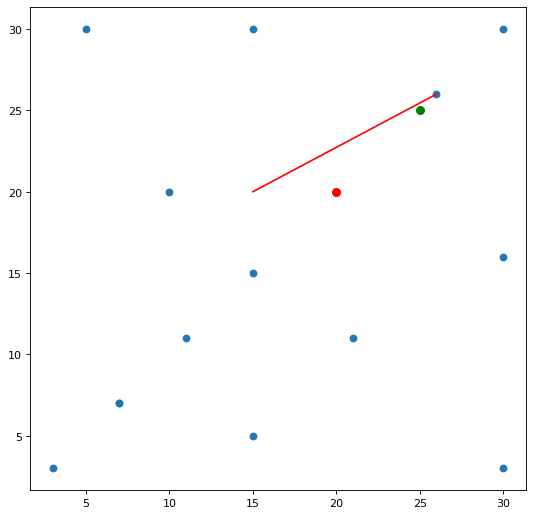

In [15]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x, y)
plt.plot(p, q, color = "red")
plt.scatter(m, n, color = "green", s = 50)
plt.scatter(20, 20, color = "red", s = 50);

In [16]:
p = [15, 30]
q = [20, 30]

# C2 = A2 + B2

a = q[1] - q[0]
b = p[1] - p[0]

print(a, b)
p_q_dist = (a**2 + b**2) ** 0.5 #
print(p_q_dist)

10 15
18.027756377319946


In [22]:
result_list = []

for point in zip(x, y, names):
    pseudo_m = m.copy()
    pseudo_n = n.copy()
    #print(pseudo_m,pseudo_n)
    pseudo_m.append(point[0])
    pseudo_n.append(point[1])
    #print(point)
#print(pseudo_m, pseudo_n)

    a = abs(pseudo_m[1] - pseudo_m[0])
    b = abs(pseudo_n[1] - pseudo_n[0])

    p_q_dist = (a**2 + b**2) ** 0.5
    point = list(point)
    point.append(p_q_dist)
    result_list.append(point)
#     print( point, "--> ", p_q_dist)

print(result_list)

[[26, 26, 'a', 1.4142135623730951], [11, 11, 'b', 19.79898987322333], [15, 30, 'c', 11.180339887498949], [15, 5, 'd', 22.360679774997898], [30, 3, 'e', 22.561028345356956], [30, 16, 'f', 10.295630140987], [20, 20, 'g', 7.0710678118654755], [7, 7, 'h', 25.45584412271571], [10, 20, 'i', 15.811388300841896], [21, 11, 'j', 14.560219778561036], [30, 30, 'k', 7.0710678118654755], [15, 15, 'l', 14.142135623730951], [3, 3, 'm', 31.11269837220809], [5, 30, 'n', 20.615528128088304], [20, 20, 'o', 7.0710678118654755], [7, 7, 'p', 25.45584412271571]]


In [25]:
result_list.sort(key = lambda x: x[3])
result_list

[[26, 26, 'a', 1.4142135623730951],
 [20, 20, 'g', 7.0710678118654755],
 [30, 30, 'k', 7.0710678118654755],
 [20, 20, 'o', 7.0710678118654755],
 [30, 16, 'f', 10.295630140987],
 [15, 30, 'c', 11.180339887498949],
 [15, 15, 'l', 14.142135623730951],
 [21, 11, 'j', 14.560219778561036],
 [10, 20, 'i', 15.811388300841896],
 [11, 11, 'b', 19.79898987322333],
 [5, 30, 'n', 20.615528128088304],
 [15, 5, 'd', 22.360679774997898],
 [30, 3, 'e', 22.561028345356956],
 [7, 7, 'h', 25.45584412271571],
 [7, 7, 'p', 25.45584412271571],
 [3, 3, 'm', 31.11269837220809]]

In [26]:
closest_distance = result_list[0][2]

In [27]:
closest_distance

'a'

In [28]:
def sort_key(x):
    return x[3]
    
result_list.sort(key = sort_key)

# KNN FROM SCRATCH ON IRIS DATA SET

In [29]:
select_columns = data[["PetalLengthCm", "PetalWidthCm", "Species"]]
list_format_data = select_columns.values

In [31]:
# ARBITRARY TEST POINTS M & N
m = [0.1]
n = [1.0]

In [34]:
result_list = []
K = 10

for point in list_format_data:
    pseudo_m = m.copy()
    pseudo_n = n.copy()
    
    pseudo_m.append(point[0])
    pseudo_n.append(point[1])
    
#     print(pseudo_m, pseudo_n)

    a = abs(pseudo_m[1] - pseudo_m[0])
    b = abs(pseudo_n[1] - pseudo_n[0])

    p_q_dist = (a**2 + b**2) ** 0.5
    point = list(point)
    point.append(p_q_dist)
    result_list.append(point)
#     print( point, "--> ", p_q_dist)

# print(result_list)
result_list.sort(key = lambda x: x[3])
closest_distance = result_list[0:K]
closest_distance

[[1.0, 0.2, 'Iris-setosa', 1.2041594578792296],
 [1.3, 0.4, 'Iris-setosa', 1.3416407864998738],
 [1.1, 0.1, 'Iris-setosa', 1.3453624047073711],
 [1.2, 0.2, 'Iris-setosa', 1.3601470508735443],
 [1.2, 0.2, 'Iris-setosa', 1.3601470508735443],
 [1.3, 0.3, 'Iris-setosa', 1.3892443989449805],
 [1.3, 0.3, 'Iris-setosa', 1.3892443989449805],
 [1.3, 0.2, 'Iris-setosa', 1.4422205101855958],
 [1.3, 0.2, 'Iris-setosa', 1.4422205101855958],
 [1.3, 0.2, 'Iris-setosa', 1.4422205101855958]]